In [2]:
import numpy as np 
import pandas as pd 
import nltk   
import matplotlib.pyplot as plt           
import random 
import os
from collections import Counter 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
DATA_DIR = "../input/imdb-sentiments/"

In [4]:
data_df = pd.read_csv(DATA_DIR + 'train.csv')
data_df.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0
3,It's a strange feeling to sit alone in a theat...,0
4,"You probably all already know this by now, but...",0


In [5]:
data_df.loc[data_df['sentiment']==0].shape, data_df.loc[data_df['sentiment']==1].shape

((12500, 2), (12500, 2))

In [6]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import word_tokenize   # module for tokenizing strings

# Preprocessing

## Removing Punctuation and lower-casing

In [7]:
def remove_punctuation(text):
    return "".join(["" if ch in string.punctuation else ch.lower() for ch in text])

In [8]:
stopwords_english = set(stopwords.words('english'))
def clean_words(text):
    return "".join([
    word for word in text
    if word not in stopwords_english
])  

## Stemming

In [9]:
stemmer = PorterStemmer()
def words_stems(text):
    return "".join([
    stemmer.stem(word) for word in text
])  

## Tokenizing

In [10]:
def tokenize_text(text):
    return word_tokenize(text)

# Training preprocess

In [11]:
data_df['text'] = data_df['text'].apply(remove_punctuation).apply(clean_words).apply(words_stems).apply(tokenize_text)

data_df.head()

,text,sentiment
0,"[fr, ve, h, ge, n, repec, here, ure, re, l, f,...",0
1,"[bzrre, hrrr, ve, flle, wh, fu, fce, bu, len, ...",0
2,"[l, f, unrerkble, fl, hu, enen, w, wnerful, fv...",0
3,"[rnge, feelng, lne, n, heer, ccupe, b, pren, n...",0
4,"[u, prbbl, ll, lre, knw, h, b, nw, bu, 5, nl, ...",0


# Building word-frequency dictionary

In [12]:
positive_words = data_df.loc[data_df['sentiment'] == 1]
negative_words = data_df.loc[data_df['sentiment'] == 0]

In [13]:
positive_freq = dict(Counter([val for sublist in positive_words['text'] for val in sublist]))
negative_freq = dict(Counter([val for sublist in negative_words['text'] for val in sublist]))
    

In [14]:
positive = random.sample(list(positive_freq), 10)
negative = random.sample(list(negative_freq), 10)


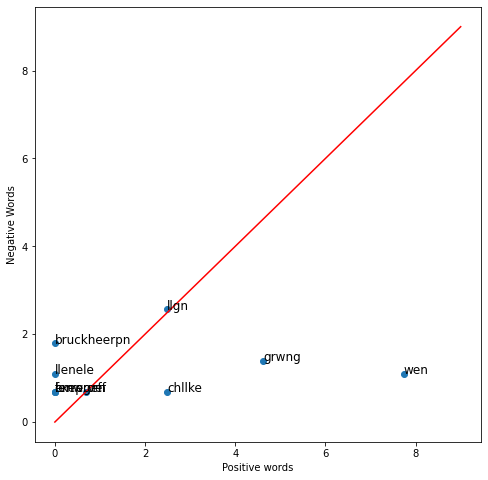

In [15]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([positive_freq[k] for k in positive])  

# do the same for the negative counts
y = np.log([negative_freq[x]+ 1 for x in negative]) 

data = list(zip(positive, negative))
# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Positive words")
plt.ylabel("Negative Words")

# Add the word as the label at the same position as you added the points just before
for i in range(len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

# Extracting Features

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [73]:
train_df = pd.read_csv(DATA_DIR + 'train.csv')

In [74]:
vectorizer = CountVectorizer(input='content')

In [76]:
train_df['text'] = train_df['text'].apply(lambda x: vectorizer.fit_transform([x]).toarray())

In [77]:
train_df.head()

,text,sentiment
0,"[[1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1,...",0
1,"[[3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",0
2,"[[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",0
3,"[[1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 8, 1, 1, 2, 1,...",0
4,"[[2, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 2, 1, 1,...",0


In [78]:
X = train_df.drop(['sentiment'], axis=1)
y = train_df['sentiment']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [81]:
X_train.shape, y_train.shape

((22500, 1), (22500,))

In [82]:
model =  MultinomialNB()

In [83]:
model.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [ ]:
model.score(X_test, y_test)